## Using Apriori Algorithm

<img src="https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fmarciaturner%2Ffiles%2F2018%2F01%2FWegmans-Produce-1.jpg" width="800px">

Frequent Itemsets via Apriori Algorithm

Apriori function to extract frequent itemsets for association rule mining

We have a dataset of a mall with 7500 transactions of different customers buying different items from the store.
We need to find correlations between the different items in the store. so that we can know the next item the customer would be interested in buying from the store if they are buying apples, bananas, and mangos. 

## Overview
Apriori is a popular algorithm for extracting frequent itemsets with applications in association rule learning. The apriori algorithm has been designed to operate on databases containing transactions, such as purchases by customers of a store. An itemset is considered as "frequent" if it meets a user-specified support threshold. For instance, if the support threshold is set to 0.5 (50%), a frequent itemset is defined as a set of items that occur together in at least 50% of all transactions in the database.

**Importing libraries**

In [ ]:
# conda install -c conda-forge squarify
# conda install -c conda-forge mlxtend
!pip install squarify


In [ ]:
!pip install mlxtend


In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for defining path
import os
# print(os.listdir('../input/'))

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


/Users/prakritsinha/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Importing the dataset**

In [2]:
# reading the dataset

data = pd.read_csv('store_transaction.csv', header = None)

# let's check the shape of the dataset
data.shape

(7501, 20)

In [3]:
import pandas

In [4]:
# checking the head of the data

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# checkng the tail of the data

data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
type(data[19][1])

float

In [28]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# checking the random entries in the data

data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
6827,yams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6556,frozen vegetables,mineral water,carrots,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2968,french fries,hot dogs,energy drink,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5896,burgers,cider,barbecue sauce,chocolate,asparagus,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5969,burgers,ham,shrimp,milk,french wine,vegetables mix,french fries,frozen smoothie,fresh bread,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2259,cottage cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,mineral water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7342,turkey,herb & pepper,red wine,parmesan cheese,mineral water,olive oil,bacon,salmon,green tea,french fries,champagne,cottage cheese,tomato juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7463,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3492,shrimp,ground beef,pepper,spaghetti,pancakes,honey,body spray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# let's describe the dataset

data.describe()

/Users/prakritsinha/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


## Data Visualizations

In [30]:
all_elements = data.values.tolist()
flat_list = [item for sublist in all_elements for item in sublist]
cleanedList = [x for x in flat_list if str(x) != 'nan']
temp_df = pd.DataFrame({'col':cleanedList})

In [ ]:
!pip install wordcloud

In [ ]:
!pip install --upgrade matplotlib


/Users/prakritsinha/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


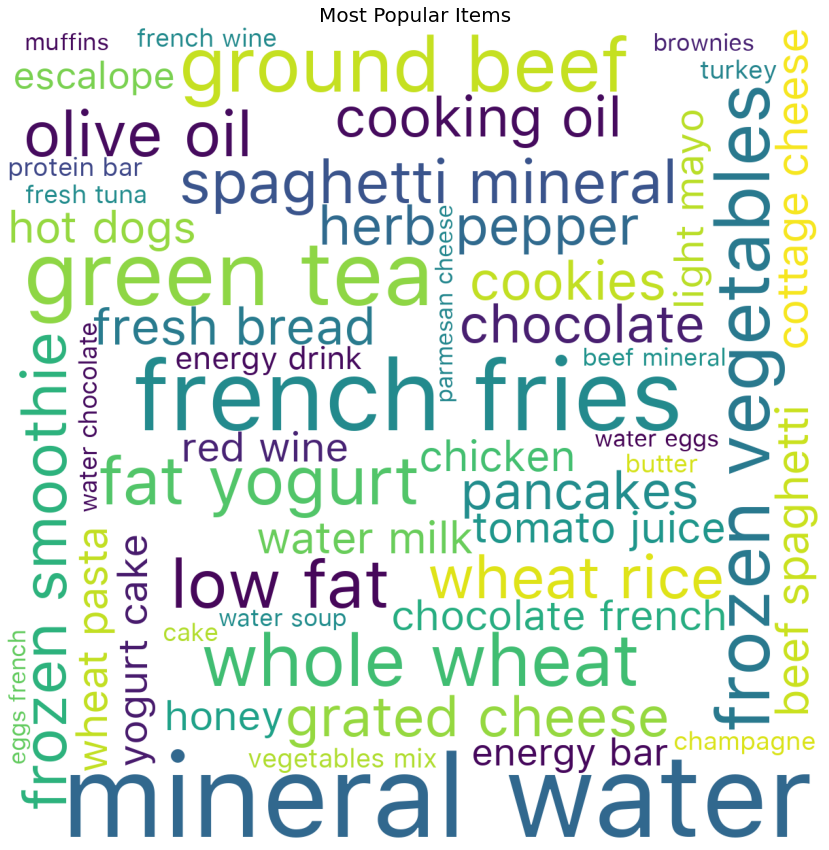

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
font_path = '/System/Library/Fonts/Keyboard.ttf'
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white',font_path=font_path, width = 1200,  height = 1200, max_words = 50, regexp = r"\w[\w]+").generate(str(cleanedList))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()


In [ ]:
!pip install --upgrade pip 

!pip install --upgrade Pillow

/Users/prakritsinha/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(


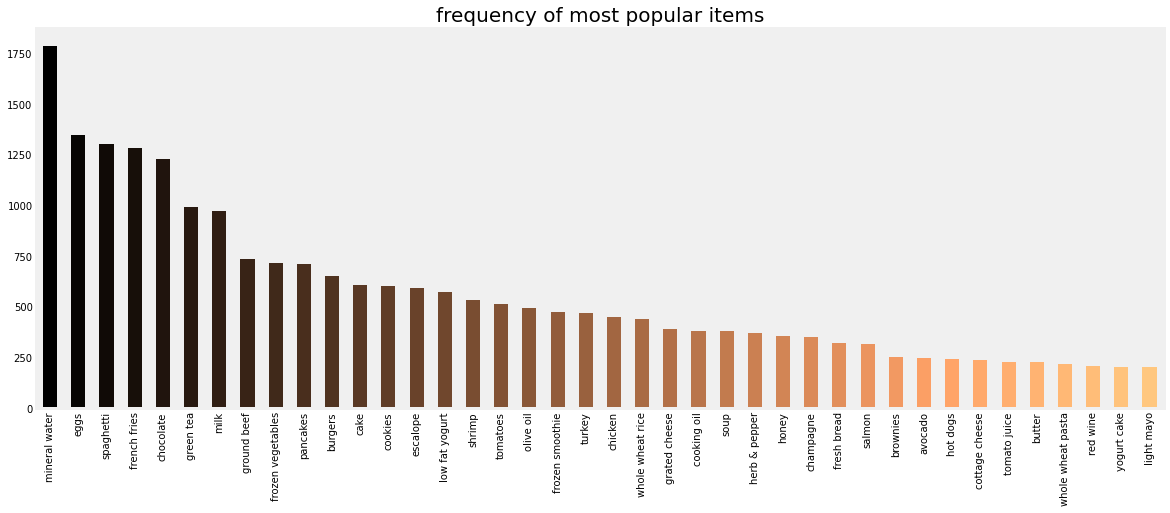

In [37]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
temp_df['col'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

/Users/prakritsinha/opt/anaconda3/lib/python3.9/site-packages/squarify/__init__.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return list(sizes)
/Users/prakritsinha/opt/anaconda3/lib/python3.9/site-packages/squarify/__init__.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return list(sizes)
/Users/prakritsinha/opt/anaconda3/lib/python3.9/site-packages/squarify/__init__.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return list(sizes)
/Users/pra

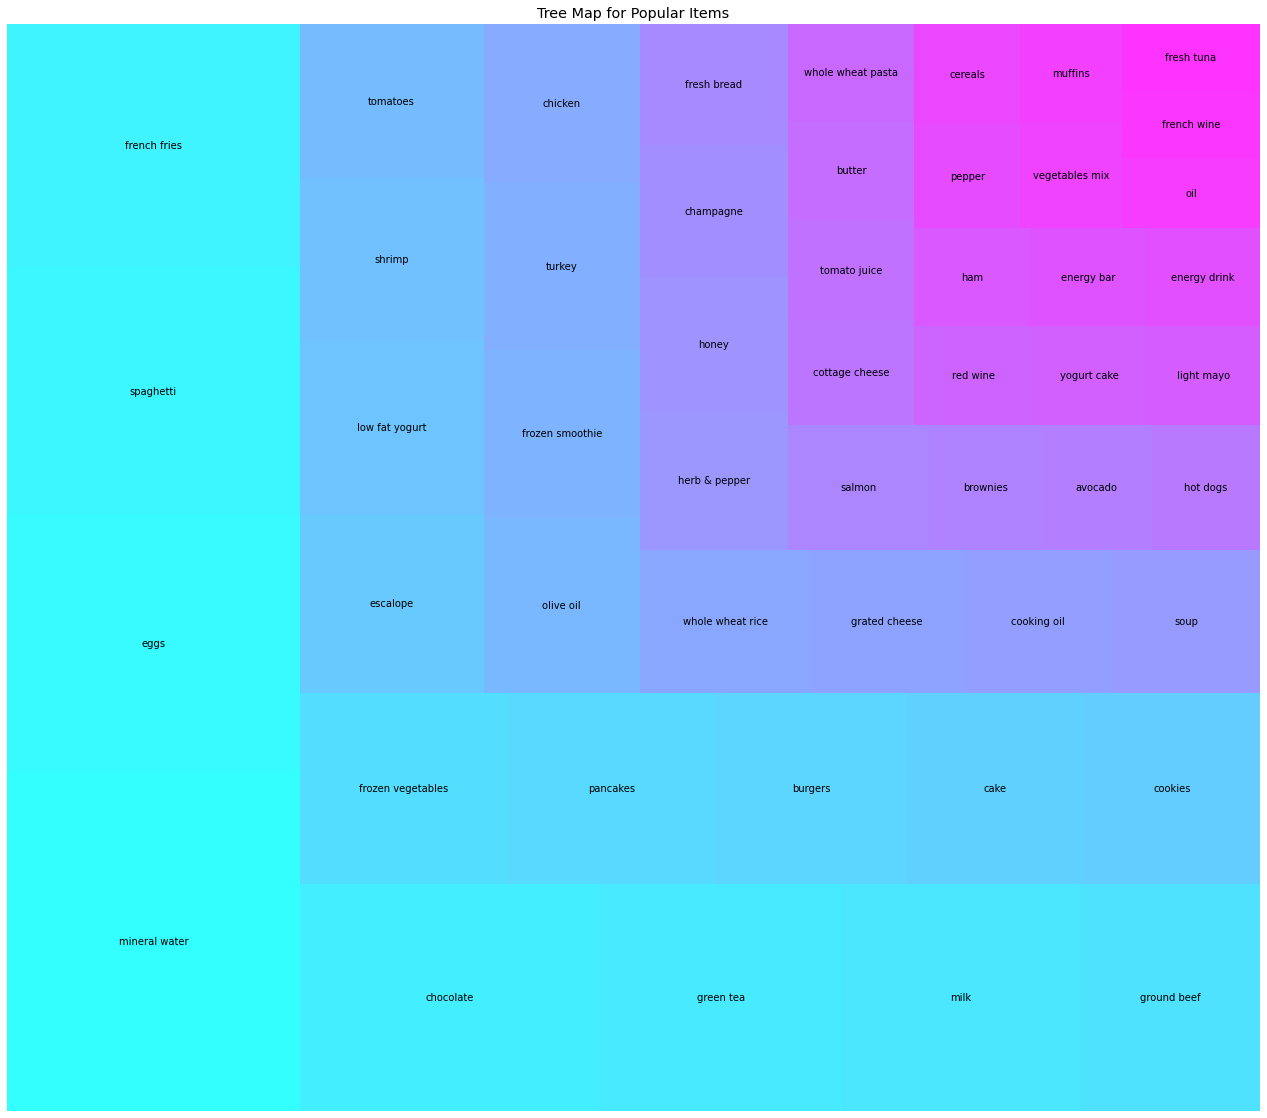

In [38]:
y = temp_df['col'].value_counts().head(50).to_frame()

# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

## Data Preprocessing

In [39]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into a numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [40]:
trans

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

## Using Transaction encoder

In [42]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# To know more about TransactionEncoder go to  http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

print(trans)

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape
print(data)

del data['nan']



[['shrimp' 'almonds' 'avocado' ... 'frozen smoothie' 'spinach'
  'olive oil']
 ['burgers' 'meatballs' 'eggs' ... 'nan' 'nan' 'nan']
 ['chutney' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ...
 ['chicken' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ['escalope' 'green tea' 'nan' ... 'nan' 'nan' 'nan']
 ['eggs' 'frozen smoothie' 'yogurt cake' ... 'nan' 'nan' 'nan']]
       asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0          False     True               True      False     True        False   
1          False    False              False      False    False        False   
2          False    False              False      False    False        False   
3          False    False              False      False     True        False   
4          False    False              False      False    False        False   
...          ...      ...                ...        ...      ...          ...   
7496       False    False              False      False    False        False   
74

In [43]:
# try on the new data below by yourself
new_data = [['Apple', 'Beer', 'Rice', 'Chicken'],
            ['Apple', 'Beer', 'Rice'], 
            ['Apple', 'Beer'], 
            ['Apple', 'Bananas'], 
            ['Milk', 'Beer', 'Rice', 'Chicken'], 
            ['Milk', 'Beer', 'Rice'], 
            ['Milk', 'Beer'], 
            ['Apple', 'Bananas']]
new_trans = []
for i in range(0, 8):
    the_tran = new_data[i]
    the_tran.extend('nan' for j in range(0, 4-len(new_data[i])))
    new_trans.append(the_tran)
new_trans = np.array(new_trans)
    
    

In [44]:
new_trans

array([['Apple', 'Beer', 'Rice', 'Chicken'],
       ['Apple', 'Beer', 'Rice', 'nan'],
       ['Apple', 'Beer', 'nan', 'nan'],
       ['Apple', 'Bananas', 'nan', 'nan'],
       ['Milk', 'Beer', 'Rice', 'Chicken'],
       ['Milk', 'Beer', 'Rice', 'nan'],
       ['Milk', 'Beer', 'nan', 'nan'],
       ['Apple', 'Bananas', 'nan', 'nan']], dtype='<U7')

In [56]:
te_new = TransactionEncoder()
data_new = te_new.fit_transform(new_trans)
data_new = pd.DataFrame(data_new, columns = te_new.columns_)
del data_new['nan']
data_new

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [ ]:
# getting the head of the data

#del data['nan']


## Applying apriori

<img src="https://blog-c7ff.kxcdn.com/blog/wp-content/uploads/2017/03/Apriori-Algorithm.jpg" width="500px">

## How does Apriori Algorithm Work ?

A key concept in Apriori algorithm is the anti-monotonicity of the support measure. It assumes that

* All subsets of a frequent itemset must be frequent
* Similarly, for any infrequent itemset, all its supersets must be infrequent too

**Step 1**: Create a frequency table of all the items that occur in all the transactions.

**Step 2**: We know that only those elements are significant for which the support is greater than or equal to the threshold support.

**Step 3**: The next step is to make all the possible pairs of the significant items keeping in mind that the order doesn’t matter, i.e., AB is same as BA.

**Step 4**: We will now count the occurrences of each pair in all the transactions.

**Step 5**: Again only those itemsets are significant which cross the support threshold

**Step 6**: Now let’s say we would like to look for a set of three items that are purchased together. We will use the itemsets found in step 5 and create a set of 3 items.

In [74]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 1% support:
apriori(data, min_support = 0.01, use_colnames = True)


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, ground beef, milk)"
253,0.017064,"(mineral water, spaghetti, ground beef)"
254,0.015731,"(mineral water, spaghetti, milk)"
255,0.010265,"(mineral water, olive oil, spaghetti)"


The advantage of working with pandas DataFrames is that we can use its convenient features to filter the results. For instance, let's assume we are only interested in itemsets of length 2 that have a support of at least 80 percent. First, we create the frequent itemsets via apriori and add a new column that stores the length of each itemset:

## Selecting and Filtering the Results

<Axes: >

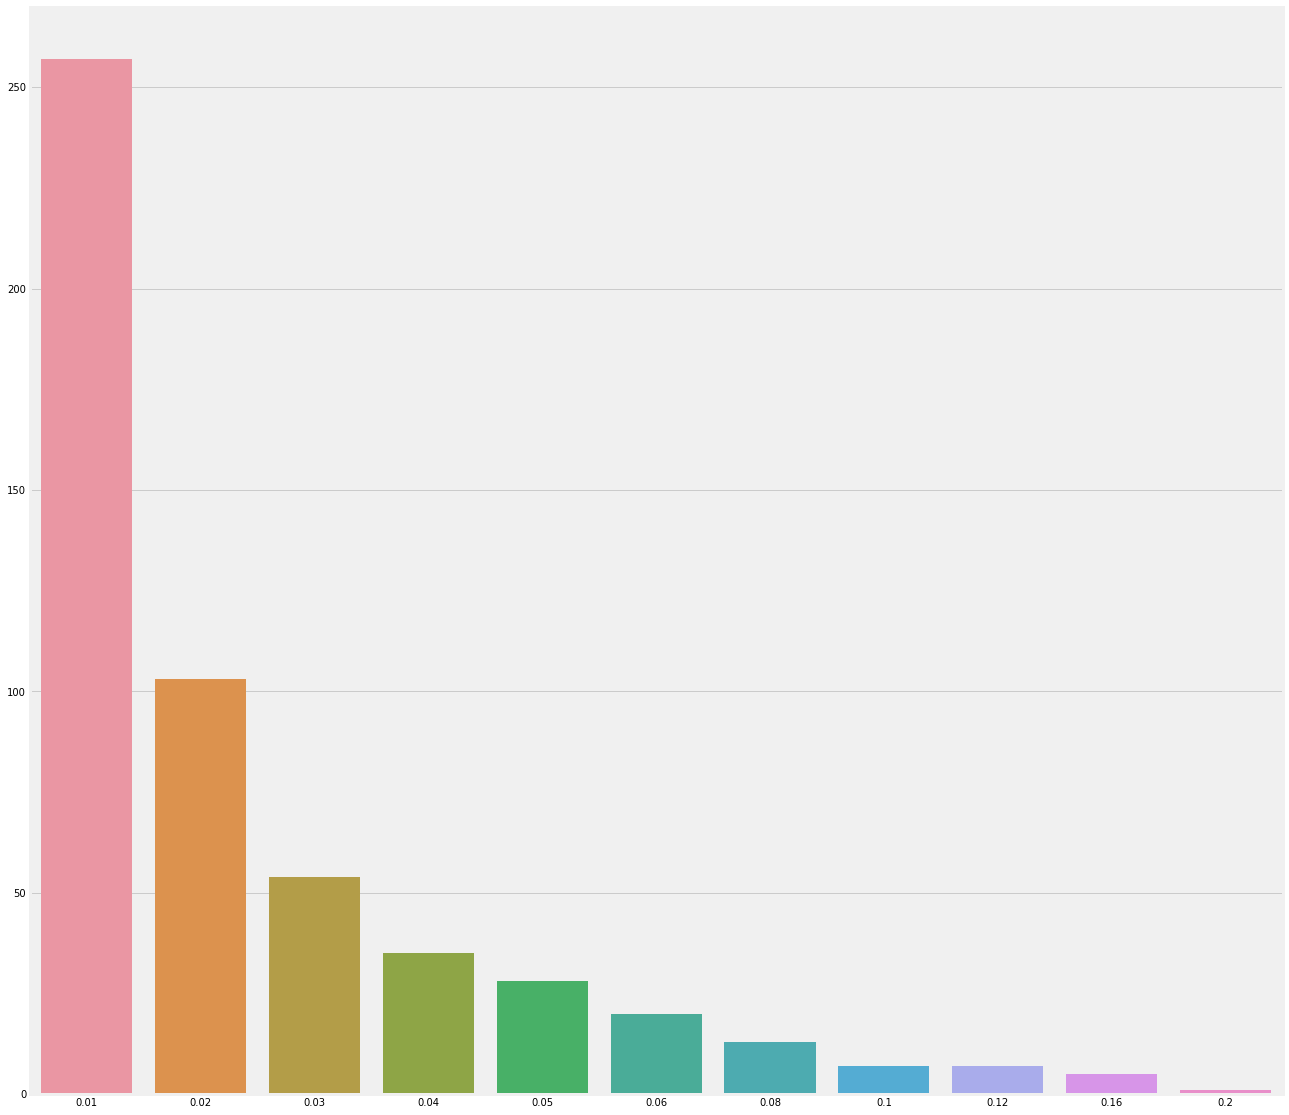

In [83]:
new_dict={}
for x in [0.01,0.02,0.03,0.04,0.05,0.06,0.08,0.1,0.12,0.16,0.2]:
    from mlxtend.frequent_patterns import apriori
    new_dict[x]=len(apriori(data, min_support = x, use_colnames = True))
supp = list(new_dict.keys())
no_itemsets = list(new_dict.values())
sns.barplot(x=supp,y=no_itemsets)

In [70]:
frequent_itemsets = apriori(data, min_support = 0.2, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1


In [109]:
# getting th item sets with length = 2 and support more han 1%
support_threhold = 0.01
length = 1

frequent_itemsets = apriori(data, min_support = support_threhold, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ])
print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ].shape)

     support             itemsets  length
0   0.020397            (almonds)       1
1   0.033329            (avocado)       1
2   0.010799     (barbecue sauce)       1
3   0.014265          (black tea)       1
4   0.011465         (body spray)       1
..       ...                  ...     ...
70  0.016531         (white wine)       1
71  0.029463  (whole wheat pasta)       1
72  0.058526   (whole wheat rice)       1
73  0.011465               (yams)       1
74  0.027330        (yogurt cake)       1

[75 rows x 3 columns]
(75, 3)


<Axes: >

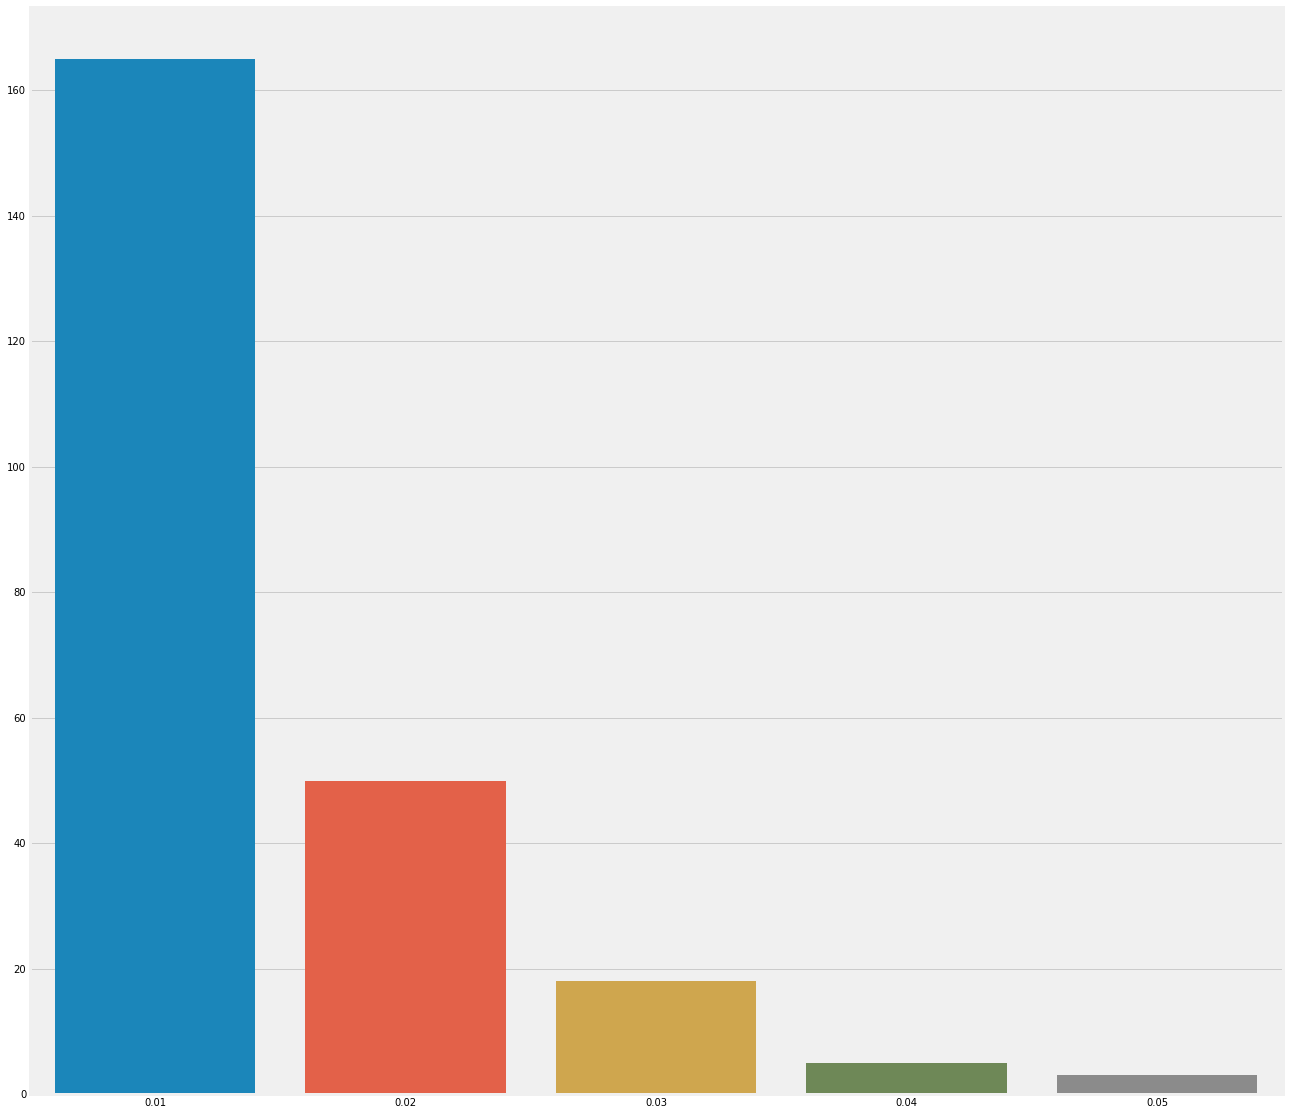

In [94]:
dict2={}
support_threhold = [0.01,0.02,0.03,0.04,0.05]
length = 2
for x in support_threhold:
    frequent_itemsets = apriori(data, min_support = x, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    dict2[x]=len(frequent_itemsets[(frequent_itemsets['length'] == length) & (frequent_itemsets['support'] >= x) ])
supp = list(dict2.keys())
no_itemsets = list(dict2.values())
sns.barplot(x=supp,y=no_itemsets)

## Association Mining

In [95]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'mineral water'}]

,support,itemsets,length
16,0.238368,(mineral water),1


In [103]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'chocolate'}]

,support,itemsets,length
3,0.163845,(chocolate),1


In [96]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'eggs'}]

,support,itemsets,length
6,0.179709,(eggs),1


In [104]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'eggs','mineral water'}]

,support,itemsets,length
26,0.050927,"(mineral water, eggs)",2


In [105]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'chocolate', 'mineral water'}]

,support,itemsets,length
25,0.05266,"(mineral water, chocolate)",2


In [106]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'Spaghetti'}]

,support,itemsets,length


This notebook is adaption from the following kaggle notebook https://www.kaggle.com/roshansharma/market-basket-analysis.